# Tensorflow Keras

This notebook shows how to solve a trivial problem by creating a network using tf.keras

### Import the needed modules

In [1]:
import numpy as np
import tensorflow as tf
import random
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

### Define the connections of the nodes in the network

In [2]:
input_ = tf.keras.layers.Input(shape=(2,))
dense1 = tf.keras.layers.Dense(32, activation='relu')(input_)
dense2 = tf.keras.layers.Dense(32, activation='relu')(dense1)
output = tf.keras.layers.Dense(1)(dense2)

### Define a model from the input node to the last dense node

In [3]:
model = tf.keras.Model(inputs=input_, outputs=output)

### Verify the structure of the created model

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


### Compile the model by providing the optimization algorithm and the loss function

In [5]:
model.compile('adam', 'mse')

### Define the non linear toy problem to check if the network will work

In [6]:
def function(x, y):
    return 5*x**2 - 3*y**2 + 3

### Generate random values and calculate the label using the toy problem

In [7]:
X = np.random.rand(100, 2)
y = function(X[:,0], X[:,1])

### View the generated values

In [8]:
X[:, 0] # access first column

array([0.54928248, 0.20868922, 0.74552345, 0.44084309, 0.30936814,
       0.42306707, 0.93163173, 0.42485998, 0.41418389, 0.68148957,
       0.96334715, 0.54972235, 0.6978896 , 0.26184856, 0.35055807,
       0.90451376, 0.38171829, 0.90785666, 0.38251831, 0.28313551,
       0.44987941, 0.90616462, 0.70485067, 0.794274  , 0.03293274,
       0.61243782, 0.8741233 , 0.71881577, 0.25289257, 0.74640453,
       0.47755774, 0.54199035, 0.32814272, 0.19538408, 0.43859735,
       0.28535832, 0.60146835, 0.04313812, 0.92950125, 0.88638178,
       0.12298501, 0.41052209, 0.89607589, 0.44046191, 0.71961982,
       0.75287649, 0.18055196, 0.50610339, 0.64227801, 0.08526456,
       0.14734024, 0.46581502, 0.03883584, 0.33540837, 0.09382603,
       0.49371364, 0.79232143, 0.28987938, 0.91725401, 0.88348217,
       0.47155896, 0.28657249, 0.94210152, 0.59671136, 0.98973202,
       0.4251618 , 0.9036896 , 0.9880702 , 0.15439522, 0.79150767,
       0.54669284, 0.04959837, 0.53322651, 0.44905733, 0.32106

In [9]:
X[:, 1] # access second column

array([0.89457667, 0.33345417, 0.2159322 , 0.43516961, 0.93594126,
       0.55720817, 0.30862149, 0.06511094, 0.42459556, 0.2117447 ,
       0.2926782 , 0.01416978, 0.64212149, 0.21027754, 0.51294101,
       0.16576241, 0.94357241, 0.56149816, 0.02231407, 0.21979353,
       0.66013624, 0.47316605, 0.93205987, 0.62894752, 0.67183382,
       0.61038923, 0.4036349 , 0.25445307, 0.82184075, 0.65264721,
       0.04873236, 0.83477022, 0.55190909, 0.38005154, 0.31165238,
       0.04555714, 0.39597483, 0.43143473, 0.35106722, 0.73513416,
       0.18554198, 0.59745234, 0.45817183, 0.23714729, 0.48041908,
       0.8460475 , 0.00424039, 0.28858274, 0.78262814, 0.26505288,
       0.24070665, 0.18077824, 0.4745802 , 0.84153427, 0.78664797,
       0.10926681, 0.43180324, 0.65089057, 0.52731701, 0.36984259,
       0.41929214, 0.7315249 , 0.89144154, 0.18082916, 0.1217907 ,
       0.50662858, 0.97469041, 0.53838187, 0.12670482, 0.01070232,
       0.3052675 , 0.6884815 , 0.39954328, 0.98005459, 0.57500

In [10]:
y

array([2.10775397, 2.88418091, 5.63914596, 3.40359538, 0.85058509,
       2.96348591, 7.0539467 , 3.8898117 , 3.31689731, 5.18763273,
       7.38320709, 4.51037096, 4.19828948, 3.21017342, 2.82512936,
       7.00829414, 1.05755759, 6.17517804, 3.73010753, 3.25590099,
       2.70461785, 6.43401328, 2.87786552, 4.96763098, 1.65134077,
       3.75767539, 6.33169428, 5.38924145, 1.29350662, 4.50775349,
       4.13318243, 2.37824374, 2.62457728, 2.75755718, 3.67045655,
       3.40092051, 4.33843269, 2.4508967 , 6.95011831, 5.30709661,
       2.97234908, 2.77179405, 6.38499575, 3.80131696, 4.89685598,
       3.68672593, 3.1629411 , 4.03086322, 3.2250848 , 2.82559113,
       2.93472666, 3.98687585, 2.33186203, 1.43795412, 1.18757152,
       4.18294806, 5.57950409, 2.14917467, 6.37258493, 6.49235312,
       3.58442157, 1.80523291, 5.05377233, 4.68222469, 7.85334838,
       3.1337952 , 4.23321023, 7.01184852, 3.07102709, 6.1320783 ,
       4.2148006 , 1.59027966, 3.94274804, 1.12674144, 2.52351

In [11]:
model.fit(X, y, batch_size=4, epochs=100)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 5ms/sample - loss: 16.8358
Epoch 2/100
100/100 [==============================] - 0s 919us/sample - loss: 13.5268
Epoch 3/100
100/100 [==============================] - 0s 943us/sample - loss: 9.5916
Epoch 4/100
100/100 [==============================] - 0s 783us/sample - loss: 5.5157
Epoch 5/100
100/100 [==============================] - 0s 975us/sample - loss: 3.0192
Epoch 6/100
100/100 [==============================] - 0s 803us/sample - loss: 2.2523
Epoch 7/100
100/100 [==============================] - 0s 922us/sample - loss: 1.9222
Epoch 8/100
100/100 [==============================] - 0s 909us/sample - loss: 1.5379
Epoch 9/100
100/100 [==============================] - 0s 1ms/sample - loss: 1.2296
Epoch 10/100
100/100 [==============================] - 0s 770us/sample - loss: 0.9789
Epoch 11/100
100/100 [==============================] - 0s 961us/sample - loss: 0.7885
Epoch 12/100
100/100 [===========

100/100 [==============================] - 0s 871us/sample - loss: 0.0414
Epoch 96/100
100/100 [==============================] - 0s 791us/sample - loss: 0.0387
Epoch 97/100
100/100 [==============================] - 0s 992us/sample - loss: 0.0388
Epoch 98/100
100/100 [==============================] - 0s 942us/sample - loss: 0.0381
Epoch 99/100
100/100 [==============================] - 0s 1ms/sample - loss: 0.0388
Epoch 100/100
100/100 [==============================] - 0s 919us/sample - loss: 0.0362


### Predict the label using the model and verify the result

In [12]:
predictions = model.predict(X)

In [13]:
predictions[:5] # first 5 rows

array([[2.2167451],
       [2.9072351],
       [5.84826  ],
       [3.5800223],
       [1.2372991]], dtype=float32)

In [14]:
y[:5] # first 5 rows

array([2.10775397, 2.88418091, 5.63914596, 3.40359538, 0.85058509])

In [15]:
def plot_3d(x, y, z, size):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    plt.show()

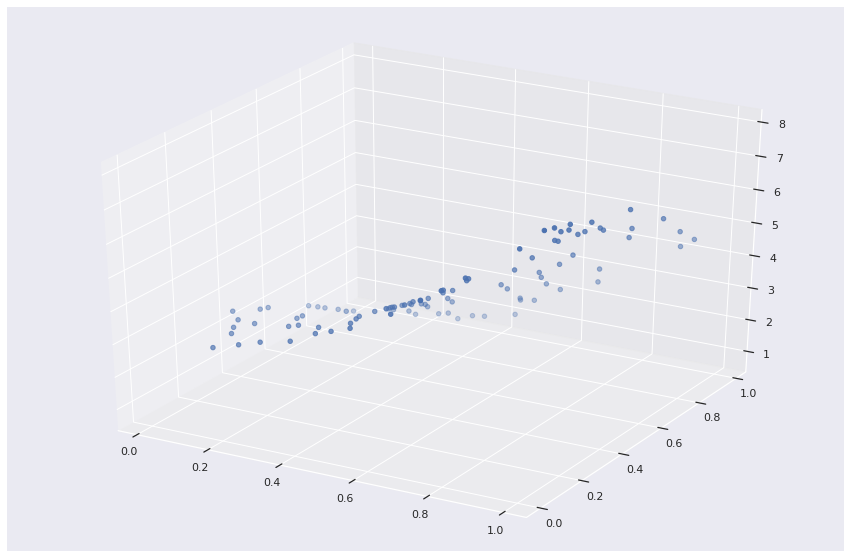

In [16]:
plot_3d(X[:, 0], X[:, 1], y, (15, 10))

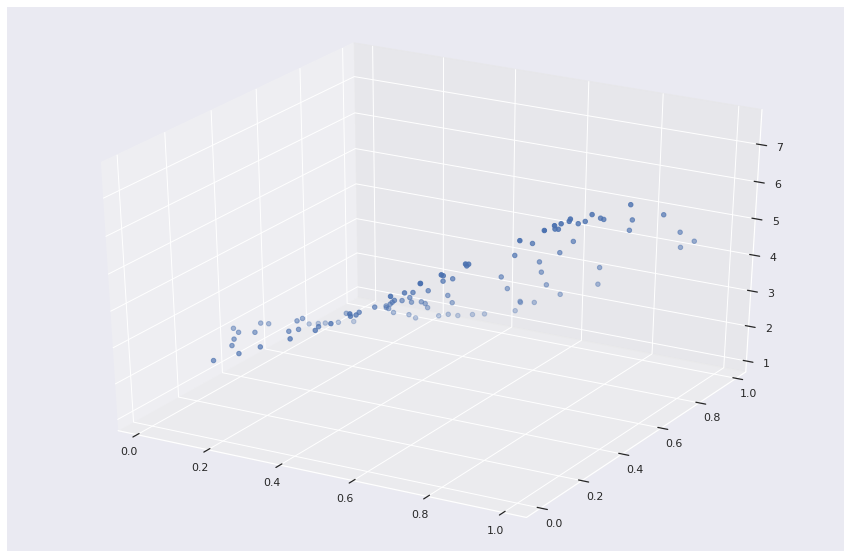

In [17]:
plot_3d(X[:, 0], X[:, 1], predictions[:, 0], (15, 10))

### The loss can also be calculated using the ```evaluate``` function

In [18]:
model.evaluate(X, y)

100/100 [==============================] - 0s 1ms/sample - loss: 0.0365


0.03652567736804485